In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [1]:
df_obj=pd.read_csv("Churn_Modelling.csv")

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
def return_explode_list(explode_count):
    explode_List=[]
    for i in range(0,explode_count):
        if i%2==0:
            explode_List.append(.1)
        else:
            explode_List.append(0)
    return explode_List


In [81]:
def plot_categorical_value_distribution(data,column_name,disp_column_name,count):
    number_of_columns=len(column_name)
    available_color_list_values=list(sns.crayons.values())
#     fig, axes = plt.subplots(nrows = number_of_columns, ncols = 2, sharex = False)#, figsize=(12, 12)
    col_itr=0
    for eachCol in column_name:
        total_unique_value=data[eachCol].value_counts().nlargest(count).shape[0]
        colors_list = random.choices(available_color_list_values,k=total_unique_value)
        plt.subplot(col_itr+1, 2, 1)
        ax=sns.barplot(data[eachCol].value_counts().nlargest(count).index, data[eachCol].value_counts().nlargest(count)
                       , palette  = colors_list)
        plt.xlabel(disp_column_name[col_itr], size = 14)
        plt.ylabel('Frequency', size = 14)
        max_value=data[eachCol].value_counts().nlargest(count).max()
        min_value=data[eachCol].value_counts().nlargest(count).min()
        plt.yticks(range(0,max_value, int(max_value*.05)))
        plt.title('Frequency occurence of each '+ disp_column_name[col_itr], y=1.05, size = 16)
        for p in ax.patches:
            ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+.5))
        
        explode_list=return_explode_list(total_unique_value)
        plt.subplot(col_itr+1, 2, 2)
        data[eachCol].value_counts().nlargest(count).plot(kind='pie', figsize=[13.66, 7.3], autopct='%1.1f%%', 
                                           startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)
        plt.title('Proportion of each type occurence in '+ disp_column_name[col_itr], y=1.05, size = 16)
        plt.ylabel('')
        plt.axis('equal')
        plt.legend(labels = data[eachCol].value_counts().nlargest(count).index, loc = 'best', frameon=False)
        plt.tight_layout(pad=2.0)
        plt.show()
        col_itr=col_itr+1

        

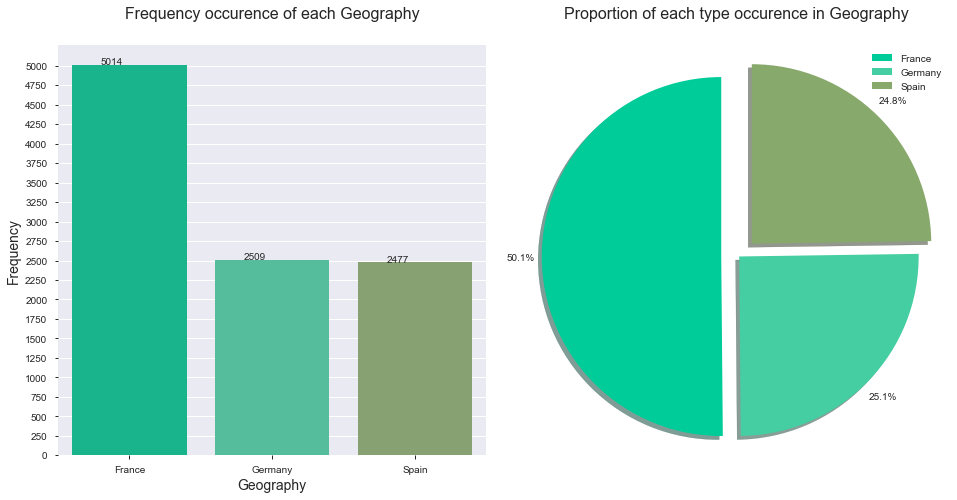

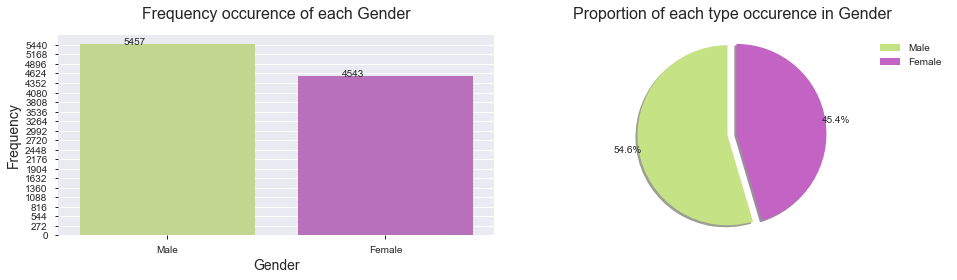

In [83]:
plot_categorical_value_distribution(df_obj,["Geography","Gender"],["Geography","Gender"],5)